In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
#Usamos PyCaret para clasificar los datos
from pycaret.classification import *

In [3]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train_con_escalado.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test_con_escalado.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape')
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape')

In [4]:
df_train = pd.concat([X_train, y_train], axis=1)

In [5]:
df_test = pd.concat([X_test, y_test], axis=1)

In [6]:
df_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-0.313,0,0,0,-0.550,0.083,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1.155,0,0,0,0
1,-0.321,0,0,0,-0.252,-0.034,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1.155,1,0,1,0
2,0.210,0,0,0,-0.550,-0.502,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0.535,0,0,0,0
3,0.285,0,0,0,-0.550,-0.502,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,-0.085,0,0,0,0
4,0.430,1,0,0,1.933,1.253,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,-1.946,0,0,0,0


In [7]:
df_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,AgeCategory_1,AgeCategory_2,AgeCategory_3,Race_0,Race_1,Race_2,Diabetic,PhysicalActivity,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-0.122,0,0,0,-0.55,-0.502,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,-0.085,0,0,0,0
1,-0.217,1,0,0,-0.55,-0.502,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0.535,0,0,0,0
2,-1.246,1,0,0,-0.55,-0.502,0,0,1,0,1,1,1,0,0,1,0,1,1,0,0,-0.085,0,0,0,0
3,-0.845,1,0,0,2.43,-0.268,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,-0.705,0,1,0,0
4,-1.416,1,0,0,-0.55,-0.502,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0.535,0,0,1,0


In [8]:
exp_clf101 = setup(data = df_train, target = 'HeartDisease', session_id=10001)

,Description,Value
0,Session id,10001
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(38312, 26)"
4,Transformed data shape,"(38312, 26)"
5,Transformed train set shape,"(26818, 26)"
6,Transformed test set shape,"(11494, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7581,0.8337,0.7909,0.7423,0.7658,0.5163,0.5174,0.5680
xgboost,Extreme Gradient Boosting,0.7517,0.8269,0.7751,0.7405,0.7573,0.5034,0.5040,2.4710
gbc,Gradient Boosting Classifier,0.7439,0.8202,0.7411,0.7452,0.7432,0.4877,0.4878,1.9750
rf,Random Forest Classifier,0.7377,0.8078,0.7591,0.7280,0.7432,0.4754,0.4759,1.6310
et,Extra Trees Classifier,0.7254,0.7860,0.7429,0.7178,0.7301,0.4507,0.4510,2.7160
ada,Ada Boost Classifier,0.7243,0.7978,0.6800,0.7461,0.7115,0.4486,0.4504,0.7450
lr,Logistic Regression,0.7235,0.7968,0.6818,0.7439,0.7115,0.4471,0.4487,0.4860
lda,Linear Discriminant Analysis,0.7222,0.7959,0.6723,0.7468,0.7076,0.4443,0.4466,0.2190
ridge,Ridge Classifier,0.7221,0.0000,0.6722,0.7466,0.7074,0.4441,0.4463,0.0490
knn,K Neighbors Classifier,0.7164,0.7751,0.7165,0.7164,0.7164,0.4328,0.4329,0.4570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Naive Bayes porque es el mas rápido

In [10]:
setup(df_train, target="HeartDisease", session_id=10001)
nb = create_model('nb')
nb

,Description,Value
0,Session id,10001
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(38312, 26)"
4,Transformed data shape,"(38312, 26)"
5,Transformed train set shape,"(26818, 26)"
6,Transformed test set shape,"(11494, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7767,0.5951,0.7571,0.6664,0.4042,0.4138
1,0.6961,0.7721,0.5802,0.7553,0.6563,0.3922,0.4032
2,0.7122,0.7801,0.6092,0.7671,0.6791,0.4243,0.4336
3,0.6950,0.7697,0.5921,0.7455,0.6600,0.3900,0.3985
4,0.6913,0.7725,0.5720,0.7512,0.6494,0.3826,0.3939
5,0.6987,0.7732,0.5899,0.7541,0.6619,0.3975,0.4072
6,0.6957,0.7757,0.5727,0.7596,0.6531,0.3915,0.4039
7,0.6894,0.7701,0.5675,0.7505,0.6463,0.3788,0.3906
8,0.6923,0.7731,0.5701,0.7542,0.6494,0.3845,0.3965


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
tuned_nb = tune_model(nb, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7767,0.5951,0.7571,0.6664,0.4042,0.4138
1,0.6961,0.7721,0.5802,0.7553,0.6563,0.3922,0.4032
2,0.7122,0.7801,0.6092,0.7671,0.6791,0.4243,0.4336
3,0.6950,0.7697,0.5921,0.7455,0.6600,0.3900,0.3985
4,0.6913,0.7725,0.5720,0.7512,0.6494,0.3826,0.3939
5,0.6987,0.7732,0.5899,0.7541,0.6619,0.3975,0.4072
6,0.6957,0.7757,0.5727,0.7596,0.6531,0.3915,0.4039
7,0.6894,0.7701,0.5675,0.7505,0.6463,0.3788,0.3906
8,0.6923,0.7731,0.5701,0.7542,0.6494,0.3845,0.3965


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

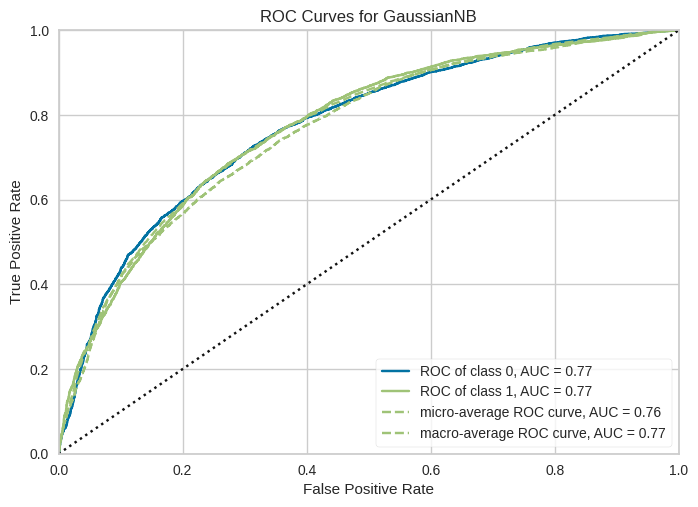

In [13]:
plot_model(tuned_nb, plot = 'auc')

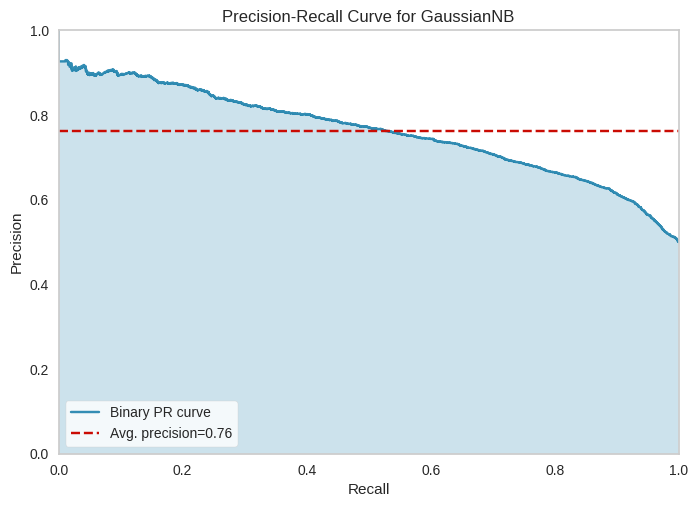

In [14]:
plot_model(tuned_nb ,plot = 'pr')

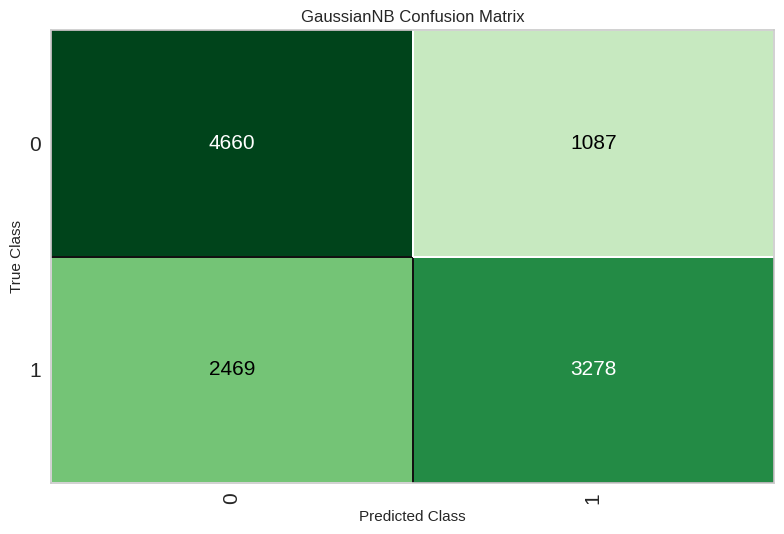

In [15]:
plot_model(tuned_nb, plot = 'confusion_matrix')

In [16]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predict_model(tuned_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6906,0.7731,0.5704,0.7510,0.6483,0.3812,0.3928


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,...,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease,prediction_label,prediction_score
17459,-0.220,1,0,0,-0.550,-0.502,0,1,0,0,...,0,1,0,-0.705,0,0,0,0,0,0.977
11017,1.306,0,0,0,0.443,-0.502,0,0,1,1,...,0,0,1,-0.085,1,0,0,0,0,0.999
10657,-1.490,0,0,0,-0.550,-0.502,0,0,1,0,...,0,0,1,-0.085,0,0,0,0,0,0.992
35416,-0.463,0,0,1,0.841,3.008,1,0,1,0,...,0,1,1,2.396,0,0,0,1,1,1.000
10890,2.036,1,0,0,2.430,3.008,1,1,0,0,...,1,0,1,-0.705,0,0,0,0,1,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18353,-0.438,0,0,0,-0.351,-0.502,0,1,0,0,...,0,0,1,-1.326,0,0,0,0,0,0.969
27576,1.379,1,0,1,2.430,-0.268,0,1,0,0,...,0,1,1,-1.946,0,0,1,1,1,1.000
32278,-0.420,1,0,1,2.430,-0.502,1,0,1,0,...,1,0,1,-1.946,0,0,0,1,1,1.000
22766,4.017,1,0,0,-0.550,-0.502,0,1,0,1,...,0,1,1,-0.705,0,0,0,1,1,0.714


In [18]:
final_nb = finalize_model(tuned_nb)

In [19]:
final_nb

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['BMI', 'Smoking',
                                             'AlcoholDrinking', 'Stroke',
                                             'PhysicalHealth', 'MentalHealth',
                                             'DiffWalking', 'Sex_1', 'Sex_2',
                                             'AgeCategory_0', 'AgeCategory_1',
                                             'AgeCategory_2', 'AgeCategory_3',
                                             'Race_0', 'Race_1', 'Race_2',
                                             'Diabetic', 'PhysicalActivity',
                                             'GenHe...
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [20]:
predict_model(final_nb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6916,0.7739,0.5726,0.7514,0.6499,0.3832,0.3945


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex_1,Sex_2,AgeCategory_0,...,GenHealth_0,GenHealth_1,GenHealth_2,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease,prediction_label,prediction_score
17459,-0.220,1,0,0,-0.550,-0.502,0,1,0,0,...,0,1,0,-0.705,0,0,0,0,0,0.974
11017,1.306,0,0,0,0.443,-0.502,0,0,1,1,...,0,0,1,-0.085,1,0,0,0,0,0.999
10657,-1.490,0,0,0,-0.550,-0.502,0,0,1,0,...,0,0,1,-0.085,0,0,0,0,0,0.992
35416,-0.463,0,0,1,0.841,3.008,1,0,1,0,...,0,1,1,2.396,0,0,0,1,1,1.000
10890,2.036,1,0,0,2.430,3.008,1,1,0,0,...,1,0,1,-0.705,0,0,0,0,1,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18353,-0.438,0,0,0,-0.351,-0.502,0,1,0,0,...,0,0,1,-1.326,0,0,0,0,0,0.969
27576,1.379,1,0,1,2.430,-0.268,0,1,0,0,...,0,1,1,-1.946,0,0,1,1,1,1.000
32278,-0.420,1,0,1,2.430,-0.502,1,0,1,0,...,1,0,1,-1.946,0,0,0,1,1,1.000
22766,4.017,1,0,0,-0.550,-0.502,0,1,0,1,...,0,1,1,-0.705,0,0,0,1,1,0.649


In [21]:
unseen_predictions = predict_model(final_nb, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6960,0.7727,0.5792,0.7558,0.6558,0.3920,0.4032


In [22]:
#Evaluar el modelo con los datos de prueba
from pycaret.utils.generic import check_metric

In [23]:
check_metric(unseen_predictions['HeartDisease'], unseen_predictions['prediction_label'], metric = 'Accuracy')

0.696

In [24]:
check_metric(unseen_predictions['HeartDisease'], unseen_predictions['prediction_label'], metric = 'Recall')

0.5792

In [25]:
#Salvar el modelo entrenado
save_model(final_nb,'finalModel_nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BMI', 'Smoking',
                                              'AlcoholDrinking', 'Stroke',
                                              'PhysicalHealth', 'MentalHealth',
                                              'DiffWalking', 'Sex_1', 'Sex_2',
                                              'AgeCategory_0', 'AgeCategory_1',
                                              'AgeCategory_2', 'AgeCategory_3',
                                              'Race_0', 'Race_1', 'Race_2',
                                              'Diabetic', 'PhysicalActivity',
                                              'GenHe...
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cate